In [83]:
import networkx as nx
import backboning as bb
import network_map2 as nm2
import matplotlib.pyplot as plt

In [95]:
def plot_network(G, factor, weight="weight"):
    linewidth = [d[weight] * factor for (u, v, d) in G.edges(data = True)]
    nx.draw_kamada_kawai(G, width = linewidth, labels = {n: n for n in G.nodes})
    plt.show()
    
def transform_for_bb(G):
    G_df = nx.to_pandas_edgelist(G)
    G_df.columns = ('src', 'trg', 'nij')
    G_df = bb.make_symmetric(G_df)
    return G_df

In [96]:
G = nx.read_adjlist("toy_data.txt", delimiter = " ", nodetype = int)

/anaconda3/lib/python3.6/site-packages/networkx/drawing/nx_pylab.py:611: MatplotlibDeprecationWarning: isinstance(..., numbers.Number)
  if cb.is_numlike(alpha):


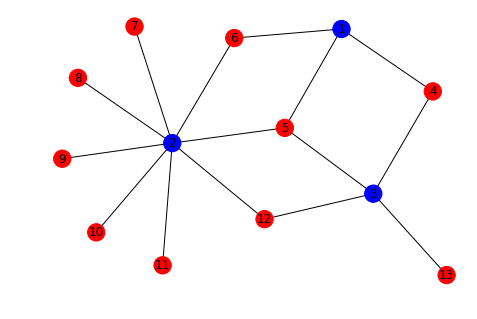

In [97]:
nodes = nx.algorithms.bipartite.basic.sets(G)
rows = sorted(list(nodes[1]))
cols = sorted(list(nodes[0]))
nx.draw_kamada_kawai(G, labels = {n: n for n in G.nodes}, node_color = ['b' if n in cols else 'r' for n in G.nodes])
plt.show()

/anaconda3/lib/python3.6/site-packages/networkx/drawing/nx_pylab.py:611: MatplotlibDeprecationWarning: isinstance(..., numbers.Number)
  if cb.is_numlike(alpha):


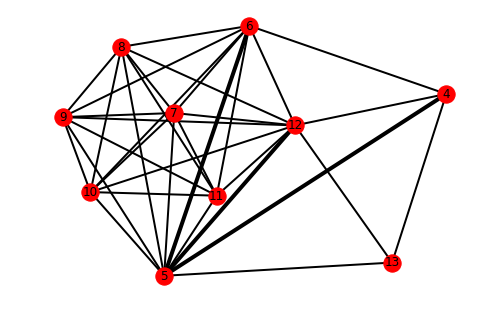

In [98]:
G_simple = nm2.simple(G, rows)
plot_network(G_simple, 2)

/anaconda3/lib/python3.6/site-packages/networkx/drawing/nx_pylab.py:611: MatplotlibDeprecationWarning: isinstance(..., numbers.Number)
  if cb.is_numlike(alpha):


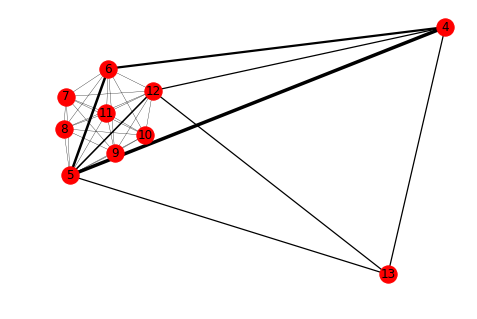

In [99]:
G_hyperbolic = nm2.hyperbolic(G, rows)
plot_network(G_hyperbolic, 20)

/anaconda3/lib/python3.6/site-packages/networkx/drawing/nx_pylab.py:611: MatplotlibDeprecationWarning: isinstance(..., numbers.Number)
  if cb.is_numlike(alpha):


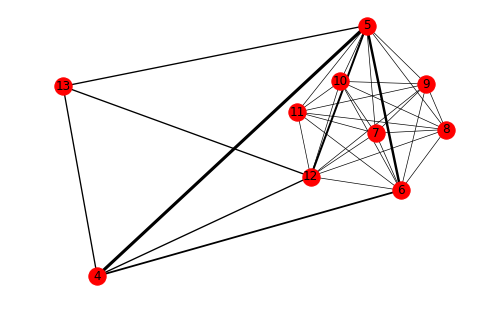

In [100]:
G_ycn = nm2.ycn(G, rows)
plot_network(G_ycn, 80)

/anaconda3/lib/python3.6/site-packages/networkx/drawing/nx_pylab.py:611: MatplotlibDeprecationWarning: isinstance(..., numbers.Number)
  if cb.is_numlike(alpha):


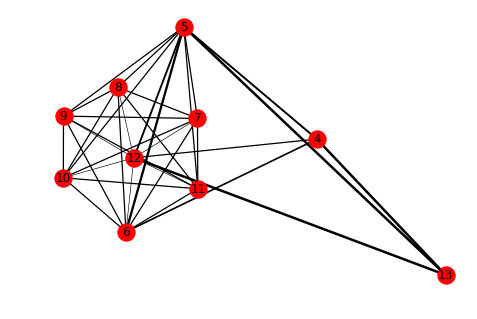

In [101]:
G_probs = nm2.probs(G, rows)
plot_network(G_probs, 10)

   threshold  #nodes  %nodes  #edges      %edges  avgdegree  %avgdegree
0          0      10   100.0      34  100.000000        6.8    1.000000
1          1       4    40.0       3    8.823529        1.5    0.220588


/anaconda3/lib/python3.6/site-packages/networkx/drawing/nx_pylab.py:611: MatplotlibDeprecationWarning: isinstance(..., numbers.Number)
  if cb.is_numlike(alpha):


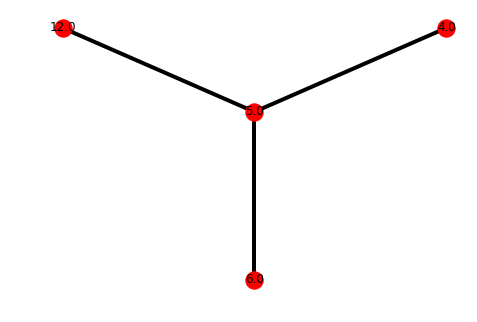

In [103]:
G_simple_df = transform_for_bb(G_simple)
G_simple_df_naive = bb.naive(G_simple_df, undirected = True)
print(bb.test_densities(G_simple_df_naive, 0, 3, 1))
G_simple_df_naive_bb = bb.thresholding(G_simple_df_naive, 1)
G_simple_naive = nx.from_pandas_edgelist(G_simple_df_naive_bb, source = 'src', target = "trg", edge_attr = ('nij', 'score'))
plot_network(G_simple_naive, 2, weight = "nij")

    src  trg  nij     score  sdev_cij
0     4   13    1  0.662921  0.102369
4     5   13    1  0.345455  0.221015
33   12   13    1  0.423077  0.194854
1     4   12    1  0.193548  0.308291
5     5   12    2  0.104478  0.212905
12    6   12    1 -0.097561  0.413724
18    7   12    1  0.027778  0.374131
23    8   12    1  0.027778  0.374131
27    9   12    1  0.027778  0.374131
30   10   12    1  0.027778  0.374131
32   11   12    1  0.027778  0.374131
2     4    6    1  0.243697  0.290350
11    5    6    2  0.156250  0.198096
3     4    5    2  0.423077  0.107850
6     5   11    1 -0.063291  0.400253
13    6   11    1  0.080292  0.357136
19    7   11    1  0.203252  0.312118
24    8   11    1  0.203252  0.312118
28    9   11    1  0.203252  0.312118
31   10   11    1  0.203252  0.312118
7     5   10    1 -0.063291  0.400253
14    6   10    1  0.080292  0.357136
20    7   10    1  0.203252  0.312118
25    8   10    1  0.203252  0.312118
29    9   10    1  0.203252  0.312118
8     5    9

/anaconda3/lib/python3.6/site-packages/networkx/drawing/nx_pylab.py:611: MatplotlibDeprecationWarning: isinstance(..., numbers.Number)
  if cb.is_numlike(alpha):


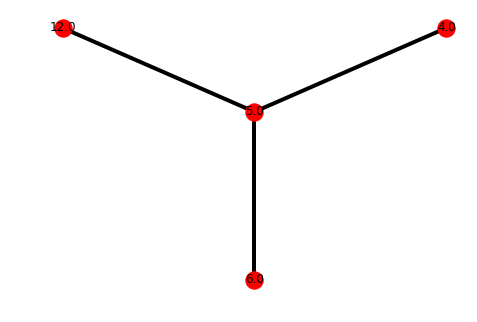

In [104]:
G_simple_df_nc = bb.noise_corrected(G_simple_df, undirected = True)
print(G_simple_df_nc)
print(bb.test_densities(G_simple_df_nc, 0, 1, .1))
G_simple_df_nc_bb = bb.thresholding(G_simple_df_nc, 0.6)
G_simple_nc = nx.from_pandas_edgelist(G_simple_df_naive_bb, source = 'src', target = "trg", edge_attr = ('nij', 'score'))
plot_network(G_simple_naive, 2, weight = "nij")

/anaconda3/lib/python3.6/site-packages/networkx/drawing/nx_pylab.py:611: MatplotlibDeprecationWarning: isinstance(..., numbers.Number)
  if cb.is_numlike(alpha):


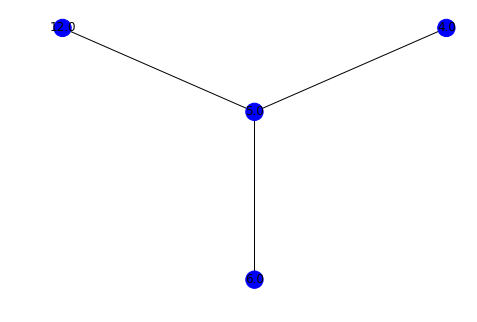

In [105]:
comms = list(nx.algorithms.community.label_propagation.label_propagation_communities(G_simple_nc))
nx.draw_kamada_kawai(G_simple_nc, labels = {n:n for n in G_simple_nc.nodes}, node_color = ['b' if n in comms[0] else 'r' for n in G_simple_nc.nodes])
plt.show()

In [106]:
G_simple_nc_conncomps = list(nx.connected_components(G_simple_nc))
print(G_simple_nc_conncomps)

[{12.0, 4.0, 5.0, 6.0}]
